<a href="https://colab.research.google.com/github/aryan2107-cloud/100-Day-ML-Challenge-/blob/main/Day16_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
!pip install statsmodels -q
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')

print(f"{df.shape[0]} cars, {df.shape[1]} columns")
df.head()

/tmp/ipython-input-2116682240.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')


398 cars, 9 columns


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [ ]:
print(df.isnull().sum())

df = df.dropna()
print(f"After dropping {len(df)} rows")

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64
After dropping 392 rows


In [ ]:
#Target variable
print(df['mpg'].describe())

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64


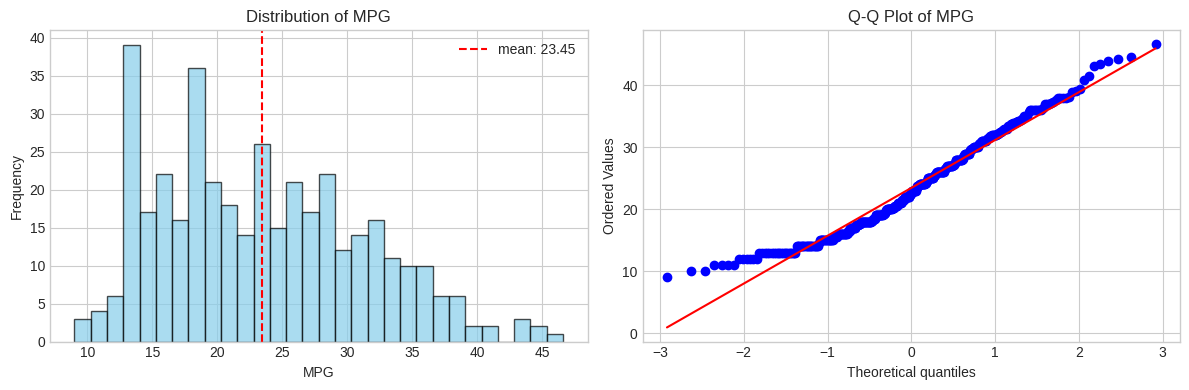

Skewness: 0.457


In [ ]:
#Visualizing the target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df['mpg'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('MPG')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of MPG')
axes[0].axvline(df['mpg'].mean(), color='red', linestyle='--', label=f'mean: {df["mpg"].mean():.2f}')
axes[0].legend()

stats.probplot(df['mpg'], dist='norm', plot=axes[1])
axes[1].set_title("Q-Q Plot of MPG")

plt.tight_layout()
plt.show()

print(f"Skewness: {df['mpg'].skew():.3f}")

In [ ]:
#Numeric features summary
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
df[numeric_cols].describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


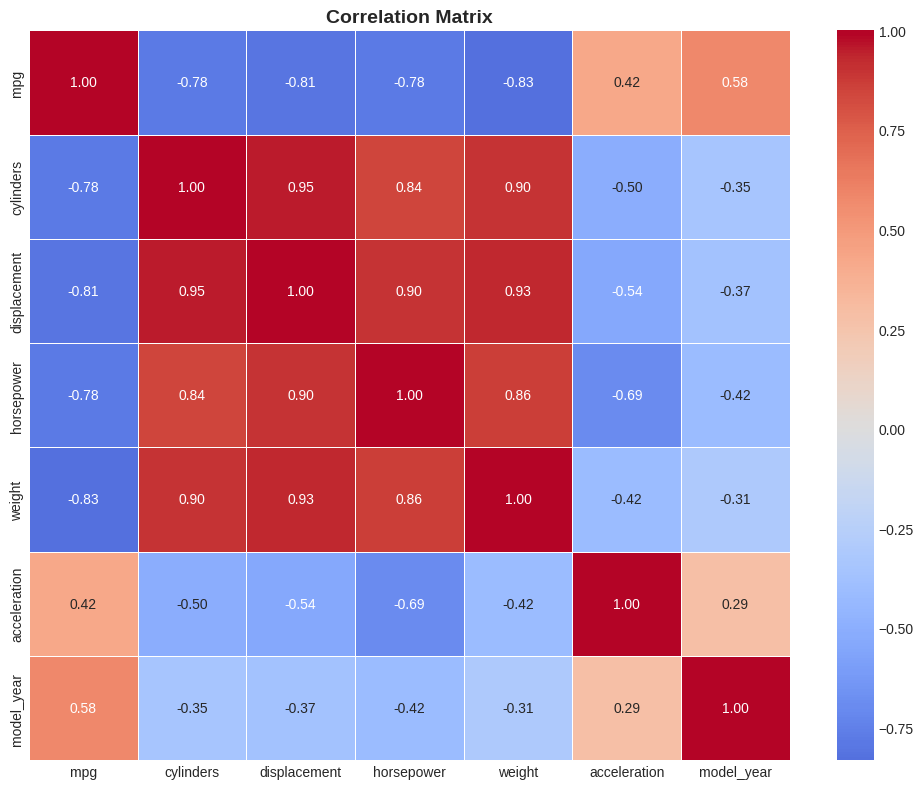

In [ ]:
#correlation analysis
fig, ax = plt.subplots(figsize=(10, 8))

corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidth=0.5, ax=ax)
ax.set_title('Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
#correlations with MPG
mpg_corr = corr_matrix['mpg'].drop('mpg').sort_values(key=abs, ascending=False)

print(mpg_corr)

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
model_year      0.580541
acceleration    0.423329
Name: mpg, dtype: float64


>Weight has STRONGEST negative correlation (-0.83)

>Displacement, cylinders, horsepower also negative

>Model year has positive correlation (newer = more efficient)

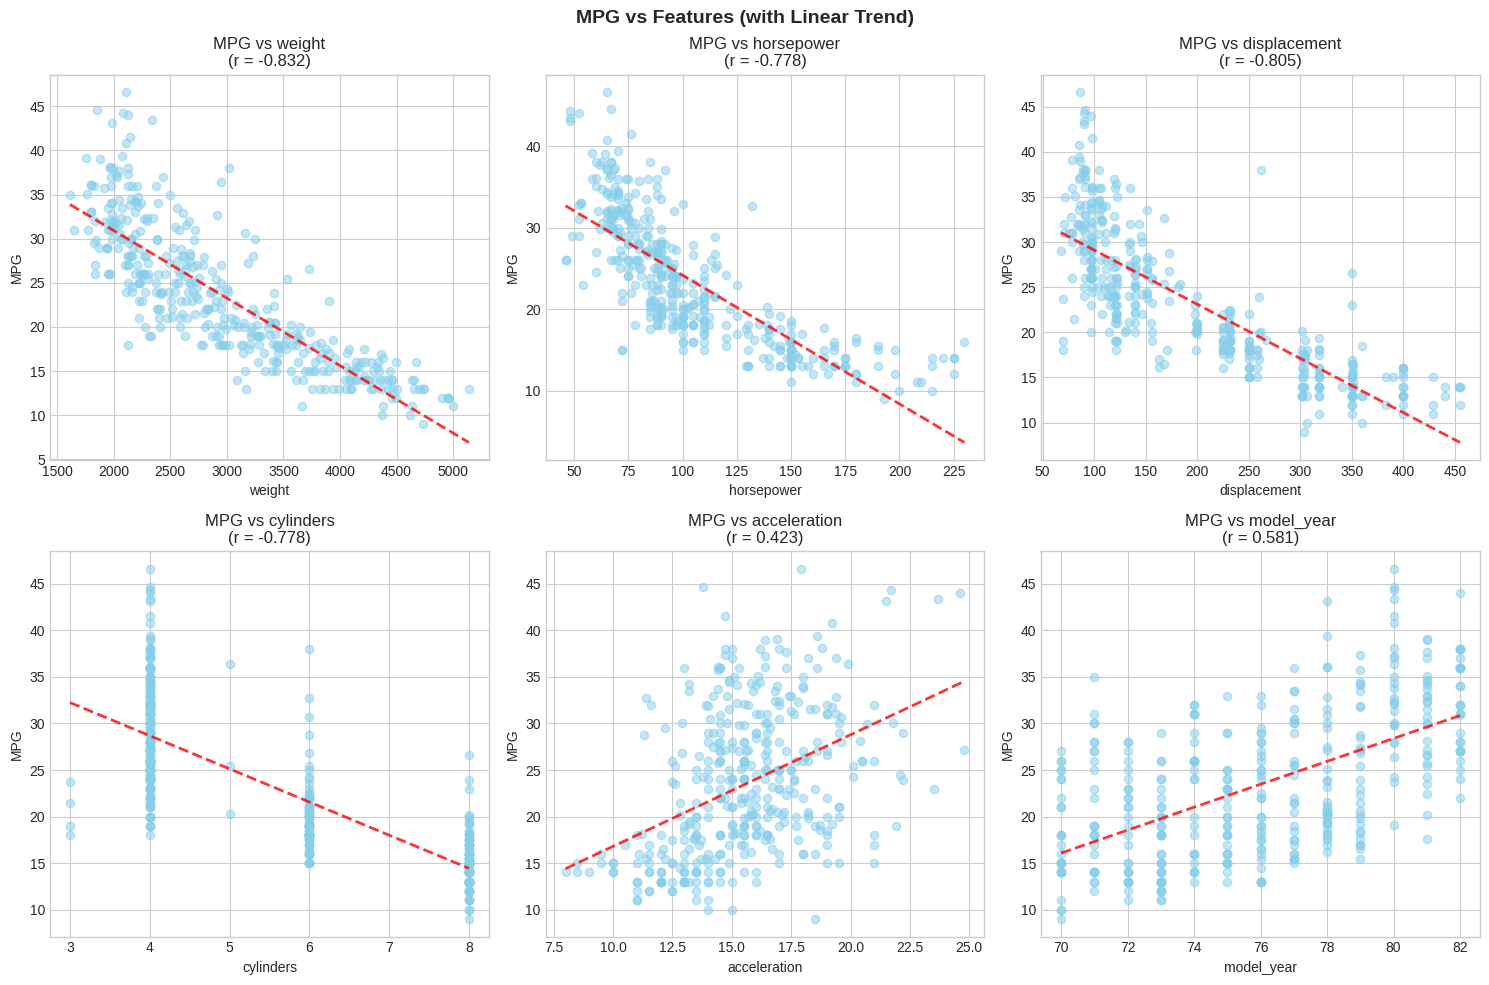

In [ ]:
# Scatter plots: MPG vs key features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

features = ['weight', 'horsepower', 'displacement', 'cylinders', 'acceleration', 'model_year']

for ax, feat in zip(axes, features):
    ax.scatter(df[feat], df['mpg'], alpha=0.5, color='skyblue')
    ax.set_xlabel(feat)
    ax.set_ylabel('MPG')
    ax.set_title(f'MPG vs {feat}\n(r = {df[feat].corr(df["mpg"]):.3f})')

    # Add trend line
    z = np.polyfit(df[feat], df['mpg'], 1)
    p = np.poly1d(z)
    ax.plot(df[feat].sort_values(), p(df[feat].sort_values()),
            "r--", alpha=0.8, linewidth=2)

plt.suptitle('MPG vs Features (with Linear Trend)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Sample Linear Regression Model

In [ ]:
x_simple = df[['weight']]
y = df['mpg']

#Train model
model_simple = LinearRegression()
model_simple.fit(x_simple, y)

print(f"Intercept: {model_simple.intercept_:.2f}")
print(f"Slope: {model_simple.coef_[0]:.6f}")
print(f"\nEquation: MPG = {model_simple.intercept_:.2f} + ({model_simple.coef_[0]:.6f}) × Weight")

Intercept: 46.22
Slope: -0.007647

Equation: MPG = 46.22 + (-0.007647) × Weight


In [ ]:
#interpret the coefficient
print(f"For every 1lb increase in weight, MPG decreases by {abs(model_simple.coef_[0]):.4f}")
print(f"For every 1000lb incease in weight, MPG decreases by {abs(model_simple.coef_[0] * 1000):.2f}")

For every 1lb increase in weight, MPG decreases by 0.0076
For every 1000lb incease in weight, MPG decreases by 7.65


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


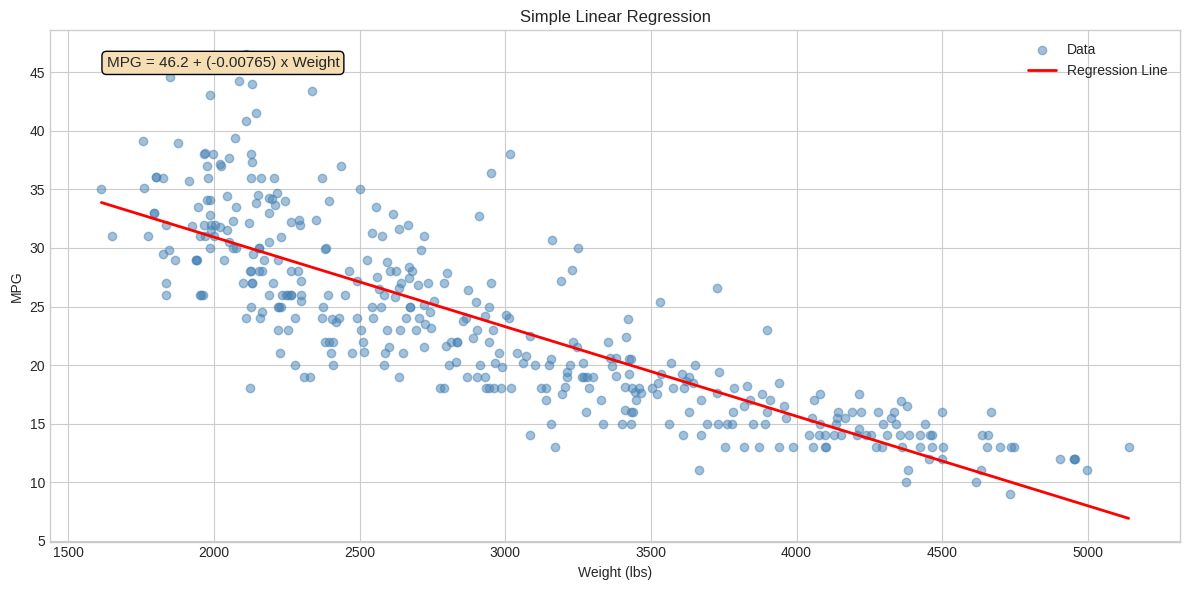

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(x_simple, y, alpha=0.5, color='steelblue', label='Data')

x_line = np.linspace(x_simple.min(), x_simple.max(), 100).reshape(-1, 1)
y_line = model_simple.predict(x_line)
ax.plot(x_line, y_line, color='r', linewidth=2, label='Regression Line')

ax.set_xlabel('Weight (lbs)')
ax.set_ylabel('MPG')
ax.set_title('Simple Linear Regression')
ax.legend()

#add equation
eq = f"MPG = {model_simple.intercept_:.1f} + ({model_simple.coef_[0]:.5f}) x Weight"
ax.text(0.05, 0.95, eq, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))

plt.tight_layout()
plt.show()

In [ ]:
#R2 score
y_pred_simple = model_simple.predict(x_simple)
r2_simple = r2_score(y, y_pred_simple)

print(f"r2 score: {r2_simple:.4f}")

r2 score: 0.6926


Multiple Linear Regression

In [ ]:
#Prepare features
feature_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

x = df[feature_cols]
y = df['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training Set: {x_train.shape[0]} samples")
print(f"Test Set: {x_test.shape[0]} samples")

Training Set: 313 samples
Test Set: 79 samples


In [ ]:
#Train multiplle regression
model_multi = LinearRegression()
model_multi.fit(x_train, y_train)

print(f"Intercept: {model_multi.intercept_:.2f}")

coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model_multi.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(coef_df.to_string(index=False))

Intercept: -15.06
     Feature  Coefficient
  model_year     0.760636
   cylinders    -0.116173
acceleration     0.061736
      weight    -0.006561
  horsepower    -0.002276
displacement     0.001013


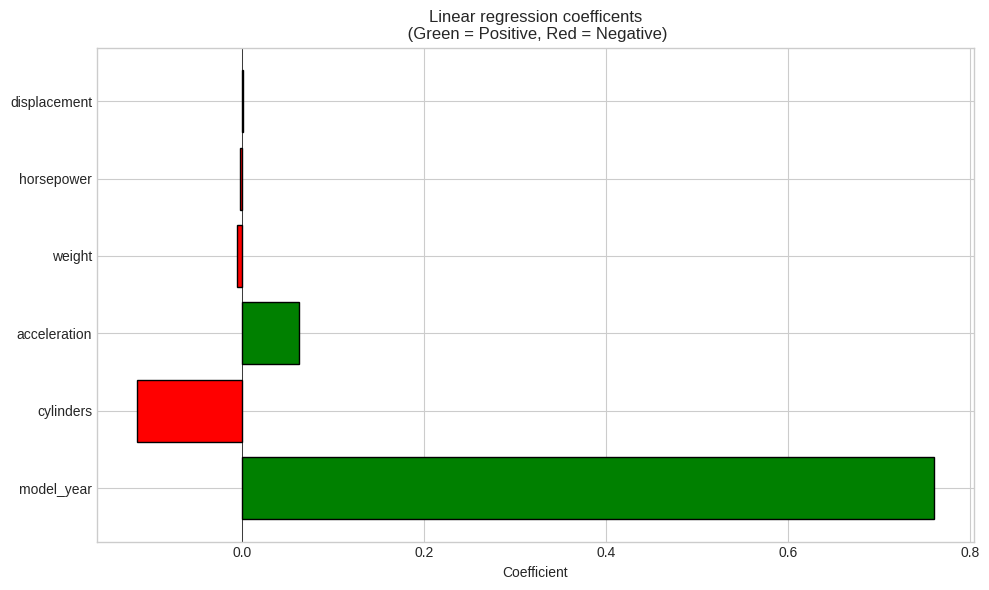

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['green' if x > 0 else 'red' for x in coef_df['Coefficient']]
ax.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, edgecolor='black')
ax.axvline(x=0, color='black', linewidth=0.5)
ax.set_xlabel("Coefficient")
ax.set_title("Linear regression coefficents\n (Green = Positive, Red = Negative)")

plt.tight_layout()
plt.show()
#Features have different scales (weight in 1000s, cylinders in single digits

In [ ]:
#model_evaluation
y_pred_train = model_multi.predict(x_train)
y_pred_test = model_multi.predict(x_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training Set MSE: {mse_train:.2f}")
print(f"Test Set MSE: {mse_test:.2f}")
print(f"Training Set MAE: {mae_train:.2f}")
print(f"Test Set MAE: {mae_test:.2f}")
print(f"Training Set R2: {r2_train:.4f}")
print(f"Test Set R2: {r2_test:.4f}")

Training Set MSE: 11.94
Test Set MSE: 10.50
Training Set MAE: 2.67
Test Set MAE: 2.50
Training Set R2: 0.8107
Test Set R2: 0.7942


 Standardized Coefficients (Fair Comparison)

In [ ]:
#scale features for fair comparison
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Train on scaled data
model_scaled = LinearRegression()
model_scaled.fit(x_train_scaled, y_train)

std_coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Std Coefficient': model_scaled.coef_
}).sort_values('Std Coefficient', key=abs, ascending=False)

print(std_coef_df.to_string(index=False))

     Feature  Std Coefficient
      weight        -5.509862
  model_year         2.756800
   cylinders        -0.197230
acceleration         0.173684
displacement         0.104997
  horsepower        -0.087007


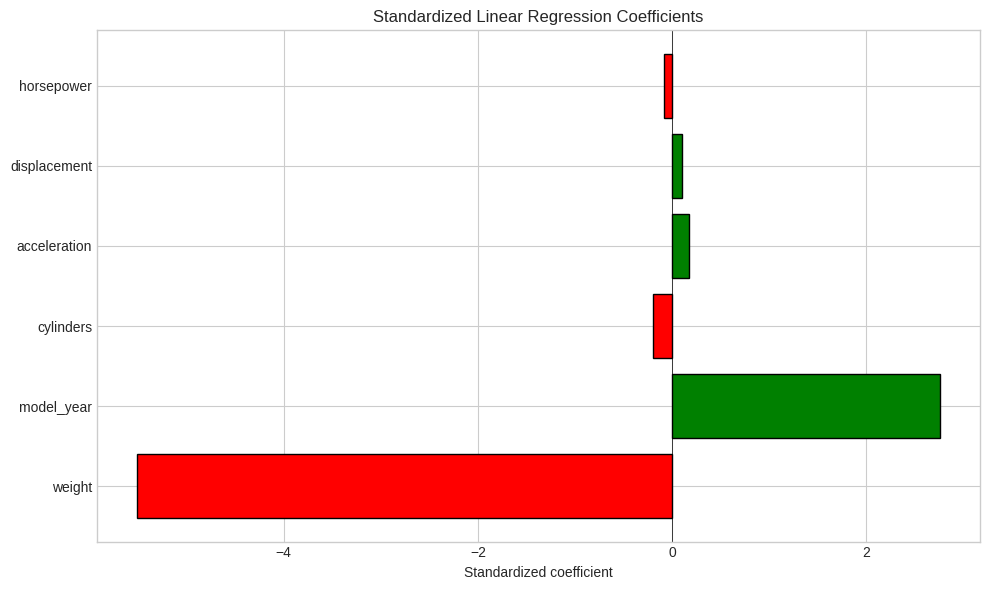

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['green' if x > 0 else 'red' for x in std_coef_df['Std Coefficient']]
ax.barh(std_coef_df['Feature'], std_coef_df['Std Coefficient'], color=colors, edgecolor='black')
ax.axvline(x=0, color='black', linewidth=0.5)
ax.set_xlabel("Standardized coefficient")
ax.set_title("Standardized Linear Regression Coefficients")

plt.tight_layout()
plt.show()

In [ ]:
print(f"  Most important: {std_coef_df.iloc[0]['Feature']} (|{std_coef_df.iloc[0]['Std Coefficient']:.3f}|)")
print(f"  Least important: {std_coef_df.iloc[-1]['Feature']} (|{std_coef_df.iloc[-1]['Std Coefficient']:.3f}|)")

  Most important: weight (|-5.510|)
  Least important: horsepower (|-0.087|)


Detailed analysis with statsmodels

In [ ]:
x_train_sm = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     218.4
Date:                Fri, 13 Feb 2026   Prob (F-statistic):          1.96e-107
Time:                        18:30:49   Log-Likelihood:                -832.28
No. Observations:                 313   AIC:                             1679.
Df Residuals:                     306   BIC:                             1705.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.0578      5.571     -2.703   

In [ ]:
#Coefficient significance
coef_summary = pd.DataFrame({
    'Feature': ['const'] + feature_cols,
    'Coefficient': model_sm.params.values,
    'Std Error': model_sm.bse.values,
    't-stat': model_sm.tvalues.values,
    'p-value': model_sm.pvalues.values,
    'Significance': ['Yes' if p < 0.05 else 'No' for p in model_sm.pvalues.values]
})
print(coef_summary.round(4).to_string(index=False))


     Feature  Coefficient  Std Error  t-stat  p-value Significance
       const     -15.0578     5.5714 -2.7027   0.0073          Yes
   cylinders      -0.1162     0.3853 -0.3015   0.7632           No
displacement       0.0010     0.0084  0.1210   0.9037           No
  horsepower      -0.0023     0.0158 -0.1438   0.8858           No
      weight      -0.0066     0.0007 -8.8066   0.0000          Yes
acceleration       0.0617     0.1149  0.5373   0.5915           No
  model_year       0.7606     0.0617 12.3328   0.0000          Yes


 p-value < 0.05 means the coefficient is statistically significant

In [ ]:
#Get predictions
y_pred = model_sm.predict(x_train_sm)
residuals = y_train - y_pred

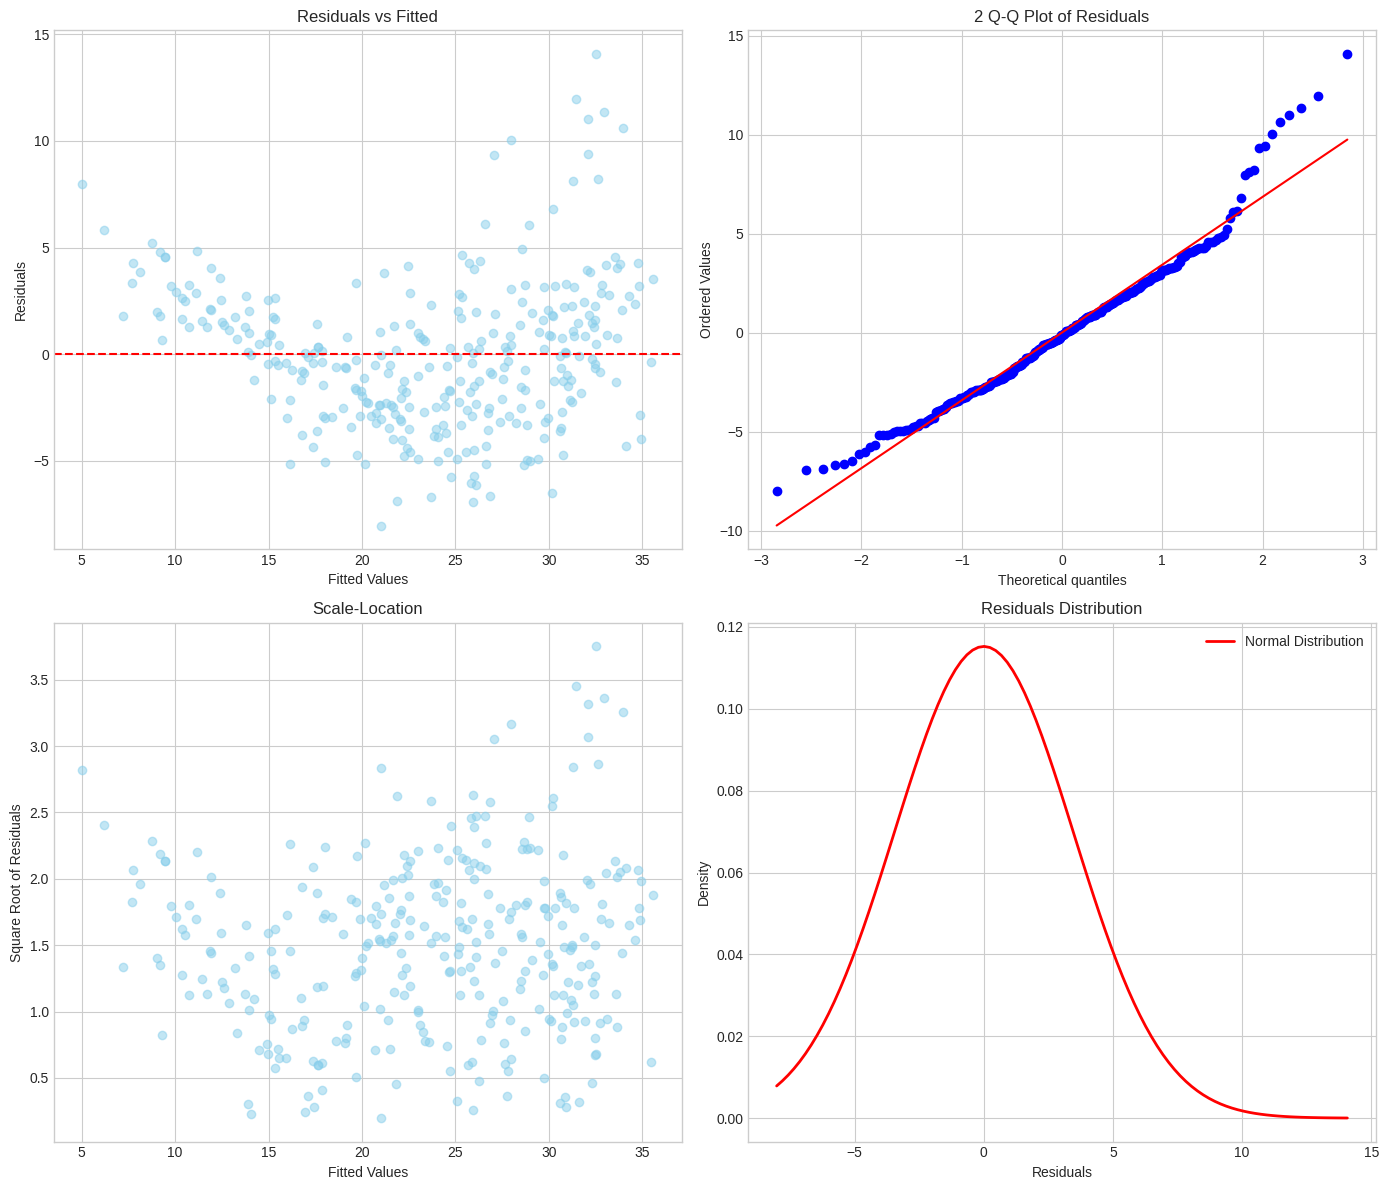

In [ ]:
#Diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

#1. Residuals vs Fitted
axes[0, 0].scatter(y_pred, residuals, alpha=0.5, color='skyblue')
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel("Fitted Values")
axes[0, 0].set_title("Residuals vs Fitted")
axes[0, 0].set_ylabel("Residuals")

#2. Q-Q plot
stats.probplot(residuals, dist='norm', plot=axes[0, 1])
axes[0, 1].set_title('2 Q-Q Plot of Residuals')

#3. Scale-location (Homodescasticity)
axes[1, 0].scatter(y_pred, np.sqrt(np.abs(residuals)), alpha=0.5, color='skyblue')
axes[1, 0].set_xlabel("Fitted Values")
axes[1, 0].set_ylabel("Square Root of Residuals")
axes[1, 0].set_title("Scale-Location")

#4. residual histogram
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
axes[1, 1].plot(x_norm, stats.norm.pdf(x_norm, residuals.mean(), residuals.std()),
                'r-', linewidth=2, label='Normal Distribution')
axes[1, 1].set_xlabel("Residuals")
axes[1, 1].set_ylabel("Density")
axes[1, 1].set_title('Residuals Distribution')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
#Statistical tests
#Normality test
shapiro_test, shapiro_p = stats.shapiro(residuals[:500])
print(f"Shapiro-Wilk Test: Statistic={shapiro_test:.4f}, p-value={shapiro_p:.4f}")

#Homodescaticity test
bp_stat, bp_p, _, _ = het_breuschpagan(residuals, x_train_sm)
print(f"Breusch-Pagan Test: Statistic={bp_stat:.4f}, p-value={bp_p:.4f}")

Shapiro-Wilk Test: Statistic=0.9676, p-value=0.0000
Breusch-Pagan Test: Statistic=18.6338, p-value=0.0048


Multicollinearity & VIF

In [ ]:
vif_data = pd.DataFrame()
vif_data['feature'] = feature_cols
vif_data['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(len(feature_cols))]
vif_data = vif_data.sort_values('VIF', ascending=False)

print(vif_data.to_string(index=False))


     feature        VIF
      weight 131.302236
   cylinders 121.456987
  model_year 106.967432
displacement  87.002207
acceleration  68.714871
  horsepower  60.706223


In [ ]:
print("\nVIF Interpretation:")
print("   VIF = 1: No correlation")
print("   VIF 1-5: Moderate correlation (usually OK)")
print("   VIF > 5: High correlation (concerning)")
print("   VIF > 10: Severe multicollinearity (problematic!)")


VIF Interpretation:
   VIF = 1: No correlation
   VIF 1-5: Moderate correlation (usually OK)
   VIF > 5: High correlation (concerning)
   VIF > 10: Severe multicollinearity (problematic!)


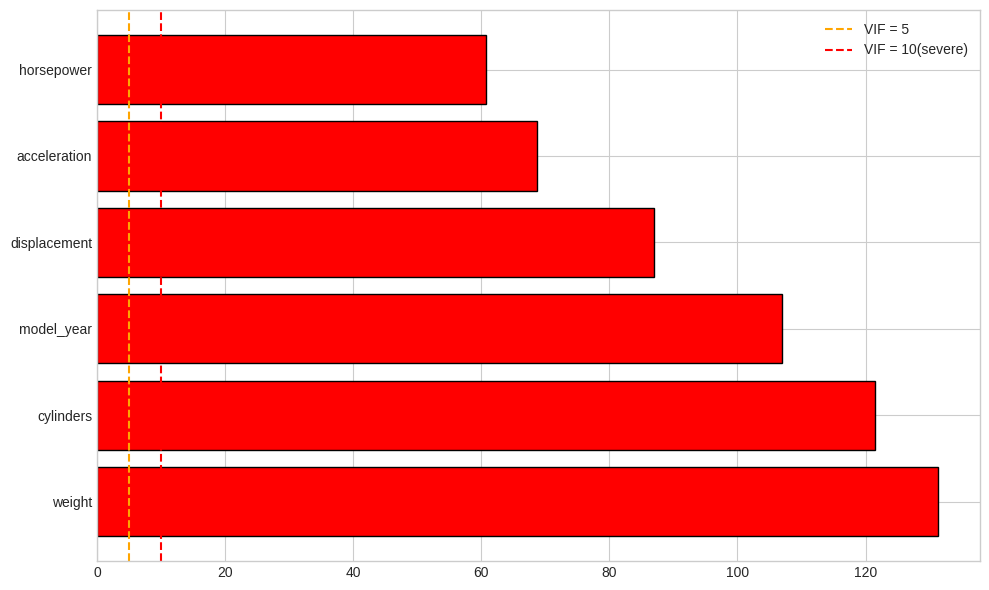

In [ ]:
#Visualize VIF
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['red' if v > 10 else 'orange' if v > 5 else 'green' for v in vif_data['VIF']]
ax.barh(vif_data['feature'], vif_data['VIF'], color=colors, edgecolor='black')
ax.axvline(x=5, color='orange', linestyle='--', label='VIF = 5')
ax.axvline(x=10, color='red', linestyle='--', label='VIF = 10(severe)')
ax.legend()

plt.tight_layout()
plt.show()

High VIF features: ['weight', 'cylinders', 'model_year', 'displacement', 'acceleration', 'horsepower']
   .Considering removing one or using regularization (Ridge/Lasso)

In [ ]:
# Why are displacement, cylinders, horsepower, weight correlated?
print("\nCorrelation among high-VIF features:")
high_vif_features = ['displacement', 'cylinders', 'horsepower', 'weight']
print(df[high_vif_features].corr().round(3))


Correlation among high-VIF features:
              displacement  cylinders  horsepower  weight
displacement         1.000      0.951       0.897   0.933
cylinders            0.951      1.000       0.843   0.898
horsepower           0.897      0.843       1.000   0.865
weight               0.933      0.898       0.865   1.000


Model without multicollinearity

In [ ]:
reduced_features = ['cylinders', 'acceleration', 'model_year']

x_train_reduced = x_train[reduced_features]
x_test_reduced = x_test[reduced_features]

#checking VIF
vif_reduced = pd.DataFrame()
vif_reduced['feature'] = reduced_features
vif_reduced['VIF'] = [variance_inflation_factor(x_train_reduced.values, i) for i in range(len(reduced_features))]

print(vif_reduced.to_string(index=False))

     feature       VIF
   cylinders 11.874860
acceleration 40.922289
  model_year 67.587689


In [ ]:
# Train reduced model
model_reduced = LinearRegression()
model_reduced.fit(x_train_reduced, y_train)

y_pred_reduced_train = model_reduced.predict(x_train_reduced)
y_pred_reduced_test = model_reduced.predict(x_test_reduced)

print(f"Training Set MSE: {mean_squared_error(y_train, y_pred_reduced_train):.2f}")
print(f"Test Set MSE: {mean_squared_error(y_test, y_pred_reduced_test):.2f}")
print(f"Training set MAE: {mean_absolute_error(y_train, y_pred_reduced_train):.2f}")
print(f"Test Set MAE: {mean_absolute_error(y_test, y_pred_reduced_test):.2f}")

Training Set MSE: 18.02
Test Set MSE: 14.55
Training set MAE: 3.27
Test Set MAE: 2.87


In [ ]:
# Cross-validation for more robust evaluation
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Full model
cv_scores_full = cross_val_score(LinearRegression(), x, y, cv=kfold, scoring='r2')

# Reduced model
cv_scores_reduced = cross_val_score(LinearRegression(), x[reduced_features], y, cv=kfold, scoring='r2')

print("Cross-Validation Results (5-Fold):")
print("="*60)
print(f"\nFull Model (6 features):")
print(f"  R² scores: {cv_scores_full.round(3)}")
print(f"  Mean: {cv_scores_full.mean():.3f} (±{cv_scores_full.std():.3f})")

print(f"\nReduced Model (3 features):")
print(f"  R² scores: {cv_scores_reduced.round(3)}")
print(f"  Mean: {cv_scores_reduced.mean():.3f} (±{cv_scores_reduced.std():.3f})")

Cross-Validation Results (5-Fold):

Full Model (6 features):
  R² scores: [0.794 0.8   0.765 0.818 0.828]
  Mean: 0.801 (±0.022)

Reduced Model (3 features):
  R² scores: [0.715 0.698 0.683 0.738 0.706]
  Mean: 0.708 (±0.018)


Text(0.5, 1.0, 'Cross-Validation R² Comparison')

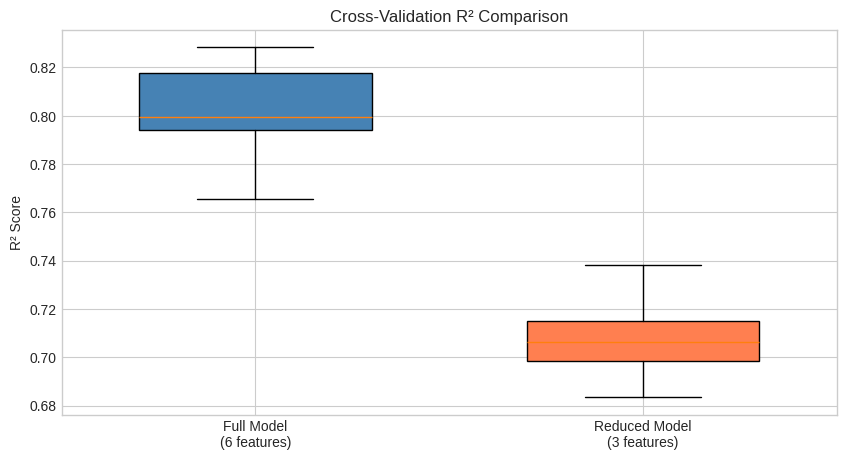

In [ ]:
# Visualize CV results
fig, ax = plt.subplots(figsize=(10, 5))

positions = [1, 2]
bp = ax.boxplot([cv_scores_full, cv_scores_reduced], positions=positions, widths=0.6, patch_artist=True)
bp['boxes'][0].set_facecolor('steelblue')
bp['boxes'][1].set_facecolor('coral')

ax.set_xticks(positions)
ax.set_xticklabels(['Full Model\n(6 features)', 'Reduced Model\n(3 features)'])
ax.set_ylabel('R² Score')
ax.set_title('Cross-Validation R² Comparison')

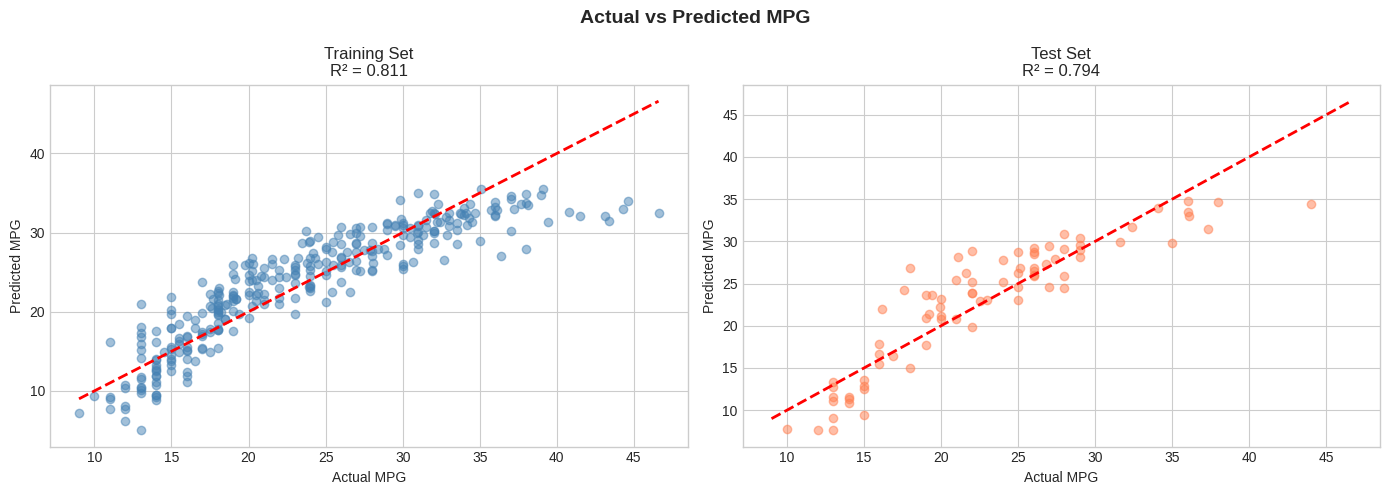

In [57]:
#%%
# Actual vs Predicted plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train, y_pred_train, alpha=0.5, color='steelblue')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Actual MPG')
axes[0].set_ylabel('Predicted MPG')
axes[0].set_title(f'Training Set\nR² = {r2_score(y_train, y_pred_train):.3f}')

# Test set
axes[1].scatter(y_test, y_pred_test, alpha=0.5, color='coral')
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
axes[1].set_xlabel('Actual MPG')
axes[1].set_ylabel('Predicted MPG')
axes[1].set_title(f'Test Set\nR² = {r2_score(y_test, y_pred_test):.3f}')

plt.suptitle('Actual vs Predicted MPG', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [59]:
# Predict for a new car
print("\nPredict MPG for a New Car")
print("="*50)

new_car = pd.DataFrame({
    'cylinders': [4],
    'displacement': [120],
    'horsepower': [80],
    'weight': [2500],
    'acceleration': [15],
    'model_year': [82]
})

predicted_mpg = model_multi.predict(new_car)[0]

print("Car Specifications:")
print(new_car.to_string(index=False))
print(f"\nPredicted MPG: {predicted_mpg:.1f}")


Predict MPG for a New Car
Car Specifications:
 cylinders  displacement  horsepower  weight  acceleration  model_year
         4           120          80    2500            15          82

Predicted MPG: 31.3
